In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
from sklearn.cluster import DBSCAN

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

## DBSCAN

In [27]:
colors = np.array(sns.color_palette("Set2", 25))

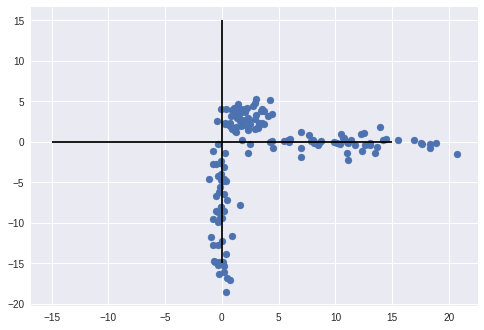

In [28]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])

plt.hlines(0,-15,15)

plt.vlines(0,-15,15)
plt.show()

### All distances between all pairs of points

In [29]:
distances = euclidean_distances(points)

In [30]:
distances.shape

(150, 150)

In [21]:
idxs = np.tril_indices(distances.shape[0])

In [31]:
distances_flat = distances[idxs]

In [32]:
distances_flat.shape

(11325,)

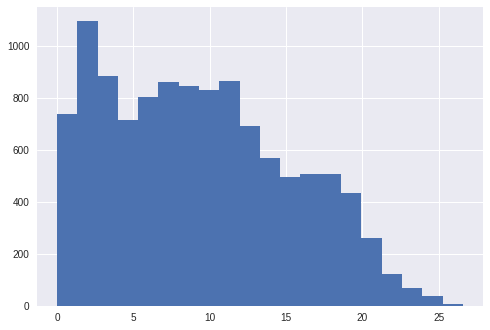

In [33]:
plt.hist(distances_flat,bins=20)
plt.show();

### k closest points

In [35]:
k=5
distances_sorted = np.sort(distances,axis=1)
distances_sorted[::10,:k]

array([[ 0.        ,  0.23301385,  0.37271891,  0.54032489,  0.74287846],
       [ 0.        ,  0.30543396,  0.6382747 ,  0.7854183 ,  0.82365651],
       [ 0.        ,  0.12588155,  0.45890474,  0.52027958,  0.80781283],
       [ 0.        ,  0.37271891,  0.41442152,  0.44118495,  0.49738758],
       [ 0.        ,  0.17819289,  0.24138058,  0.41879817,  0.50053067],
       [ 0.        ,  0.77416365,  1.13162832,  1.21155214,  1.33355795],
       [ 0.        ,  0.314036  ,  0.42946954,  0.53003321,  0.79541804],
       [ 0.        ,  0.39112321,  0.45432619,  0.54980615,  1.07509231],
       [ 0.        ,  0.29429512,  0.32764301,  0.86397041,  0.8670368 ],
       [ 0.        ,  0.52475031,  0.57833157,  1.14879039,  1.19761622],
       [ 0.        ,  0.35617842,  0.60819673,  0.63699218,  0.73012757],
       [ 0.        ,  0.34724214,  0.36145126,  0.383606  ,  0.483339  ],
       [ 0.        ,  0.42780463,  0.72244573,  0.77271517,  0.85922388],
       [ 0.        ,  0.02598956,  0.5

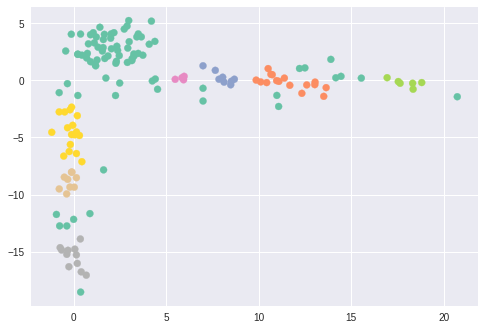

In [37]:
model = DBSCAN(1,4)
labels = model.fit_predict(points)
plt.scatter(points[:,0],points[:,1],c=colors[labels]),
plt.show();

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  1  0 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  2  0  2  2  2  2  2  3  2  3  3  2  2  3  3  3  2  2  2  2  2  2  2  2  3
  0  3  2  2  2  2  2  2  2  2  3  2  3  2  3  3  3  2  3  3  3  2  3  0  2]


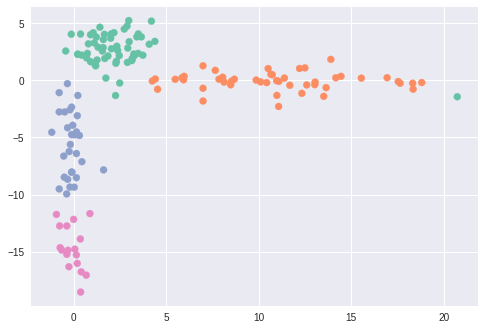

In [46]:
model = DBSCAN(1.7,4)#epsilon, min neighbours
labels = model.fit_predict(points)
print(labels)
plt.scatter(points[:,0],points[:,1],c=colors[labels]),
plt.show();

### Exercise

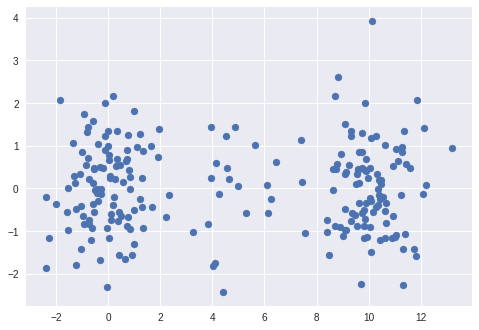

In [48]:
rnd.seed(12345)
data = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),100),
                    rnd.multivariate_normal((5,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((10,0),np.array([[1,0],[0,1]]),100)],axis=0)
plt.scatter(data[:,0],data[:,1])
plt.show()

In [49]:
distances = euclidean_distances(data)
idxs = np.tril_indices(distances.shape[0])
distances_flat = distances[idxs]
k=3
distances_sorted = np.sort(distances,axis=1)
distances_sorted[::10,:k]

array([[ 0.        ,  0.09865974,  0.31853702],
       [ 0.        ,  0.02281384,  0.23938645],
       [ 0.        ,  0.39710798,  0.84010073],
       [ 0.        ,  0.27794639,  0.32177873],
       [ 0.        ,  0.24364408,  0.4146036 ],
       [ 0.        ,  0.36361387,  0.40888095],
       [ 0.        ,  0.70379521,  0.7373553 ],
       [ 0.        ,  0.12851312,  0.35097424],
       [ 0.        ,  0.09974344,  0.10430054],
       [ 0.        ,  0.18928033,  0.19084721],
       [ 0.        ,  0.34118946,  0.65960553],
       [ 0.        ,  0.26803075,  0.42324318],
       [ 0.        ,  0.48168261,  0.50631262],
       [ 0.        ,  0.2827306 ,  0.38818585],
       [ 0.        ,  0.15997586,  0.19926562],
       [ 0.        ,  0.18555562,  0.44422132],
       [ 0.        ,  0.2145552 ,  0.26149788],
       [ 0.        ,  0.2720604 ,  0.31941194],
       [ 0.        ,  0.07909344,  0.10646431],
       [ 0.        ,  0.14286845,  0.16093575],
       [ 0.        ,  0.19171253,  0.404

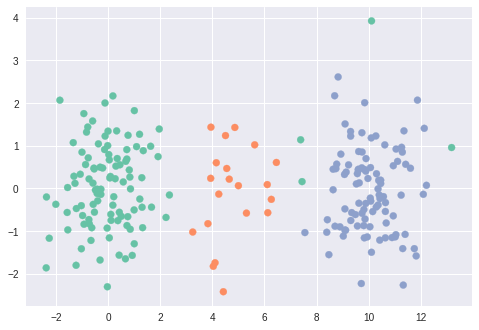

In [50]:
model = DBSCAN(1,3)#epsilon, min neighbours
labels = model.fit_predict(data)
plt.scatter(data[:,0],data[:,1],c=colors[labels]),
plt.show();

### Exercise

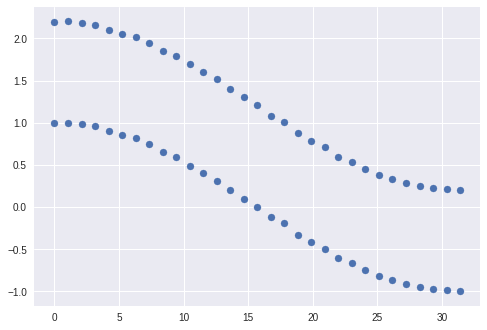

In [51]:
x = np.linspace(0,10*np.pi,31)
y = np.cos(x/10)+rnd.normal(0,0.01,len(x))

x = np.tile(x,2)
y = np.concatenate([y, y+1.2])

data = np.column_stack([x,y])
plt.scatter(data[:,0],data[:,1])
plt.show()

In [52]:
np.set_printoptions(2)

In [53]:
distances = euclidean_distances(data)
idxs = np.tril_indices(distances.shape[0])
distances_flat = distances[idxs]
k=2
distances_sorted = np.sort(distances,axis=1)
distances_sorted[::10,:k]

array([[ 0.  ,  1.05],
       [ 0.  ,  1.05],
       [ 0.  ,  1.05],
       [ 0.  ,  1.05],
       [ 0.  ,  1.05],
       [ 0.  ,  1.05],
       [ 0.  ,  1.05]])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


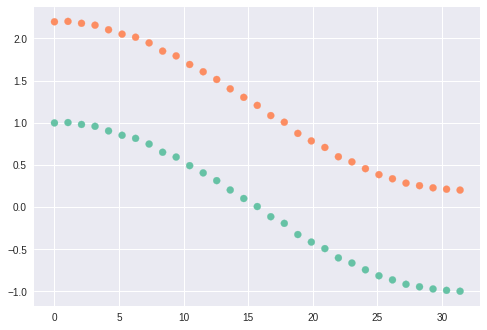

In [54]:
model = DBSCAN(1.1,2)#epsilon, min neighbours
labels = model.fit_predict(data)
print(labels)
plt.scatter(data[:,0],data[:,1],c=colors[labels]),
plt.show();

### Exercise

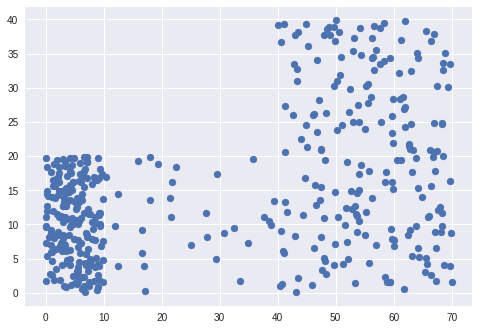

In [55]:
rnd.seed(123)
data = np.concatenate([rnd.uniform((0,0),(10,20),(200,2)),
                    rnd.uniform((40,0),(70,40),(200,2)),
                    rnd.uniform((10,0),(40,20),(30,2))],axis=0)
plt.scatter(data[:,0],data[:,1])
plt.show()

In [112]:
distances = euclidean_distances(data)
idxs = np.tril_indices(distances.shape[0])
distances_flat = distances[idxs]
k=8
distances_sorted = np.sort(distances,axis=1)
distances_sorted[:5,:k]

array([[ 0.  ,  0.78,  1.  ,  1.08,  1.28,  1.43,  1.64,  1.68],
       [ 0.  ,  0.4 ,  0.53,  0.91,  1.12,  1.37,  1.39,  1.73],
       [ 0.  ,  0.25,  0.42,  1.05,  1.31,  1.55,  1.66,  1.79],
       [ 0.  ,  2.11,  2.19,  2.38,  2.74,  2.92,  2.92,  2.95],
       [ 0.  ,  0.74,  1.04,  1.34,  1.39,  1.68,  1.69,  1.7 ]])

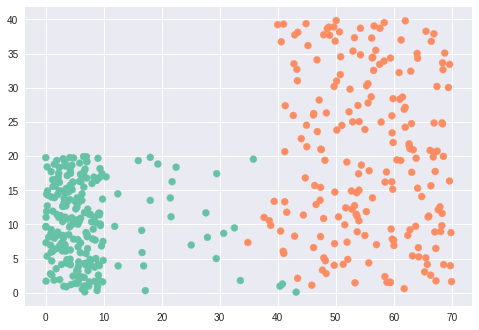

In [56]:
model = DBSCAN(5,10)#epsilon, min neighbours
labels = model.fit_predict(data)
plt.scatter(data[:,0],data[:,1],c=colors[labels]),
plt.show();